# 鳶尾花資料集 (聚類問題):

相似度(距離)

[K-Means](https://zh.wikipedia.org/wiki/K-%E5%B9%B3%E5%9D%87%E7%AE%97%E6%B3%95)(K個圓心) --> 透過迭代方式將(錯誤的圓心)轉為(正確的圓心)

假設 k=3
1. 隨便選3個點
2. 依距離分出3群
3. 重新選擇一次圓心

KMeans可以實現(自動建立類別)

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"],columns=iris["feature_names"])
df

C:\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)
C:\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [2]:
# KMeans API
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"]) # 開始訓練
# k-means++ --> k-means的強化版本,調整初始點的篩選方式(使其初始點不會重複選擇)

C:\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 112 from C header, got 124 from PyObject
  return f(*args, **kwds)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [3]:
df["label"]=cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [4]:
# 虛擬圓心
cluster.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

[五大性格特質(OCEAN)](https://zh.wikipedia.org/wiki/%E4%BA%94%E5%A4%A7%E6%80%A7%E6%A0%BC%E7%89%B9%E8%B4%A8)

# [seaborn API](https://seaborn.pydata.org/)
1. 連續型數據
2. 類別型數據

seaborn.scatterplot:(連續型數據)+(2D圖+顏色)
seaborn.countplot:(長條圖)
seaborn.distplot:(kde曲線=Kernel density estimation)

Text(0, 0.5, 'y_')

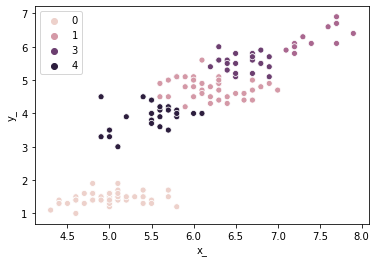

In [22]:
# 使要有圖就直接顯示
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.scatterplot(df["sepal length (cm)"],
                df["petal length (cm)"],
                hue=cluster.labels_)
plt.xlabel("x_") # 會蓋掉(sns預設的xlabel)
plt.ylabel("y_") # 會蓋掉(sns預設的ylabel)

# [Silhouette Score](https://en.wikipedia.org/wiki/Silhouette_(clustering))
* [API](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)
* 用來選擇(k值)

In [8]:
from sklearn.metrics import silhouette_score
ks = []
scores = []
for k in range(2,6):
    cluster = KMeans(n_clusters=k)
    cluster.fit(iris["data"])
    s = silhouette_score(iris["data"],cluster.labels_)
    ks.append(k)
    scores.append(s)
print("K = ",ks) # K =  [2, 3, 4, 5]
print("Scores = ",scores)

K =  [2, 3, 4, 5]
Scores =  [0.681046169211746, 0.5528190123564091, 0.4974551890173742, 0.48874888709310454]


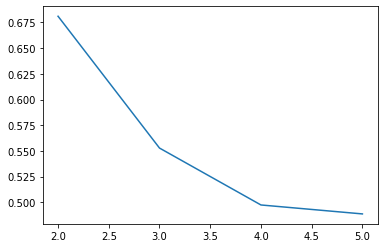

In [10]:
plt.plot(ks,scores)

## [matplotlib.pyplot.plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)

 * fmt = '[marker][line][color]'
 
## [matplotlib.pyplot.legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)

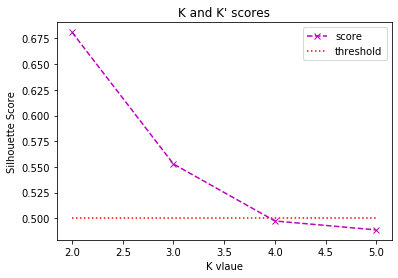

In [24]:
plt.title("K and Silhouette_Score")
plt.xlabel("K vlaue") # 標示(x軸名稱)
plt.ylabel("Silhouette Score") # 標示(y軸名稱)
p1, = plt.plot(ks,scores,'x--m',label="score")
p2, = plt.plot(ks,[0.5]*len(ks),':r',label="threshold")
plt.legend(handles=[p1,p2]) # legend --> 右上角標示(p1的label)與(p2的label)